In [8]:
from modules import *
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from matplotlib.colors import LinearSegmentedColormap, TwoSlopeNorm
import cartopy.crs as ccrs
from matplotlib import cm
import matplotlib as mpl

In [114]:
seaice = w3.load_data(['seaice'],projection='SouthPolarStereo', temporal_resolution='annual',temporal_decomposition='anomalous',detrend='raw').seaice
area = xr.open_dataset('data/area_files/processed_nsidc.nc').area

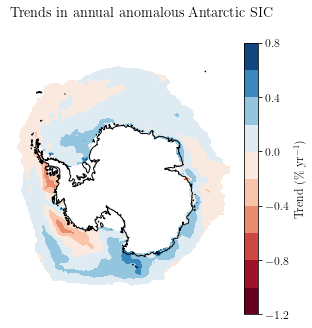

In [115]:
mpl.style.use('stylesheets/contour.mplstyle')
fig = plt.figure(figsize=(5,5))
dependant_trend = seaice.sortby('time').polyfit(dim='time', deg=1) * 1e9*60*60*24*365.25 * 100
seaice_m = dependant_trend['polyfit_coefficients'].sel(degree=1)
seaice_m = seaice_m.where(seaice_m !=0)
max_ = seaice_m.max()
min_ = seaice_m.min() 
divnorm = TwoSlopeNorm(vmin=min_, vcenter=0, vmax=max_)
levels = np.linspace(min_,max_,10)
ax = fig.add_subplot(111, projection = ccrs.SouthPolarStereo())
# Plotting
contor = ax.contourf(seaice_m.x, seaice_m.y, seaice_m.transpose(), cmap = 'RdBu', levels = 11, norm = divnorm, transform=ccrs.SouthPolarStereo())
ax.coastlines()
ax.set_axis_off()
cbar = plt.colorbar(contor)
cbar.set_label('Trend (\% yr$^{-1}$)')
fig.suptitle(f'Trends in annual anomalous Antarctic SIC')
plt.savefig('seaice_trends.pdf')
plt.show()

In [142]:
def sci_notation(number, sig_fig=2):
    ret_string = "{0:.{1:d}e}".format(number, sig_fig)
    a, b = ret_string.split("e")
    # remove leading "+" and strip leading zeros
    b = int(b)
    return "$" +a + " \\times 10^" + str(b)+ "$"

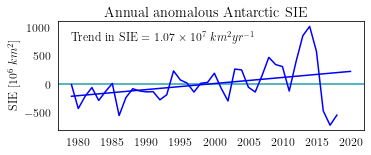

In [143]:
mpl.style.use('stylesheets/timeseries.mplstyle')
fig = plt.figure()
seaice_m = (seaice*area).sortby('time').sum(dim=('x','y'))
seaice_m = seaice_m.where(seaice_m !=0)
m, b = seaice_m.polyfit(dim='time',deg=1).polyfit_coefficients
seaice_trend = seaice_m.time.astype(np.float64) * m + b

m = m * 1e9*60*60*24*365.25 
ax = fig.add_subplot(111)
# Plotting
ax.axhline(0)
ax.plot(seaice_m.time, seaice_m/1e6, color='blue')
ax.plot(seaice_m.time, seaice_trend/1e6, color='blue')
min_ = (min(seaice.time).values)
ax.text(min_,750, f'Trend in SIE = {sci_notation(m.values, sig_fig=2)}'+' $km^2 yr^{-1}$')
ax.set_ylabel('SIE [$10^{6}\ km^{2}$]')
fig.suptitle(f'Annual anomalous Antarctic SIE')
plt.savefig('seaice_timeseries.pdf')
plt.show()